In [4]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('telco_churn.db')
cursor = conn.cursor()

df = pd.read_csv('../data/telco_churn.csv')

df.to_sql('telco_churn', conn, if_exists='replace', index=False)

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

conn.close()

[('telco_churn',)]


In [ ]:
import pandas as pd

df = pd.read_csv('../data/telco_churn.csv')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

df_encoded = pd.get_dummies(df, columns=['Contract', 'InternetService'], drop_first=True)

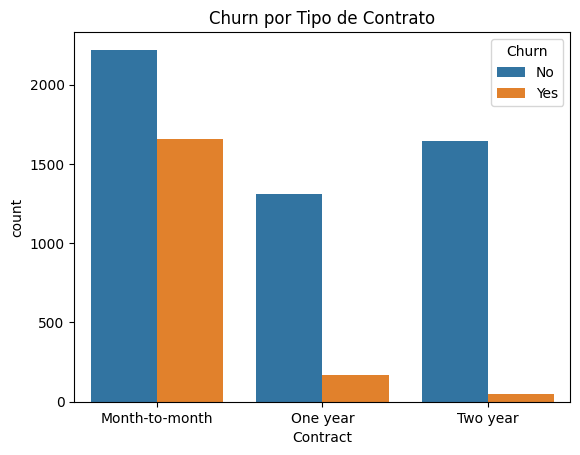

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/telco_churn.csv')

sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn por Tipo de Contrato')
plt.show()

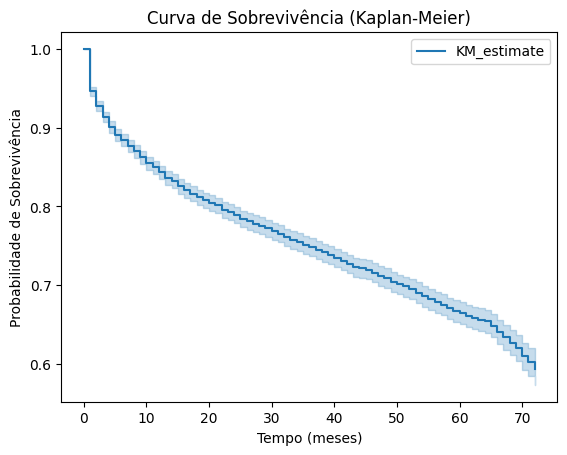

In [5]:
from lifelines import KaplanMeierFitter
import pandas as pd

df = pd.read_csv('../data/telco_churn.csv')

kmf = KaplanMeierFitter()
kmf.fit(df['tenure'], event_observed=df['Churn'] == 'Yes')

kmf.plot_survival_function()
plt.title('Curva de Sobrevivência (Kaplan-Meier)')
plt.xlabel('Tempo (meses)')
plt.ylabel('Probabilidade de Sobrevivência')
plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

df = pd.read_csv('../data/telco_churn.csv')

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df_encoded = pd.get_dummies(df, drop_first=True)
df_numeric = df_encoded.select_dtypes(include=['int64', 'float64'])

X = df_numeric.drop(['Churn'], axis=1)
y = df_numeric['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1539
           1       0.54      0.45      0.49       574

    accuracy                           0.74      2113
   macro avg       0.67      0.65      0.66      2113
weighted avg       0.73      0.74      0.74      2113

AUC-ROC: 0.7672144453274108
